<h1><b>Importing libraries</h1>

In [1]:
%load_ext cuml.accel

cuML: Accelerator installed.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import gc

<h1><b>Training the Model</h1>

In [3]:
X = pd.read_parquet('X_processed.parquet')
y = pd.read_parquet('y_processed.parquet')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

del X, y
gc.collect()

0

In [5]:

classifier = LogisticRegression(
    solver='saga',
    penalty='l2',
    C=1.5,
    class_weight='balanced',
    max_iter=700,
    n_jobs=-1,
    random_state=42
)

print("Training Logistic Regression with manual hyperparameters...")
classifier.fit(X_train, y_train)

Training Logistic Regression with manual hyperparameters...


LogisticRegression(C=1.5, class_weight='balanced', max_iter=700, n_jobs=-1,
                   random_state=42, solver='saga')

<h1><b>Testing the Model</h1>

In [6]:
y_pred = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("ROC-AUC Score : ", roc_auc)
print("F1 Score : ", f1)
print("Accuracy : ", accuracy)
print("Precision : ", precision)
print("Recall : ", recall)

ROC-AUC Score :  0.5775058680322573
F1 Score :  0.08082183040176957
Accuracy :  0.6340891387543605
Precision :  0.04430556851040015
Recall :  0.4597144931042826


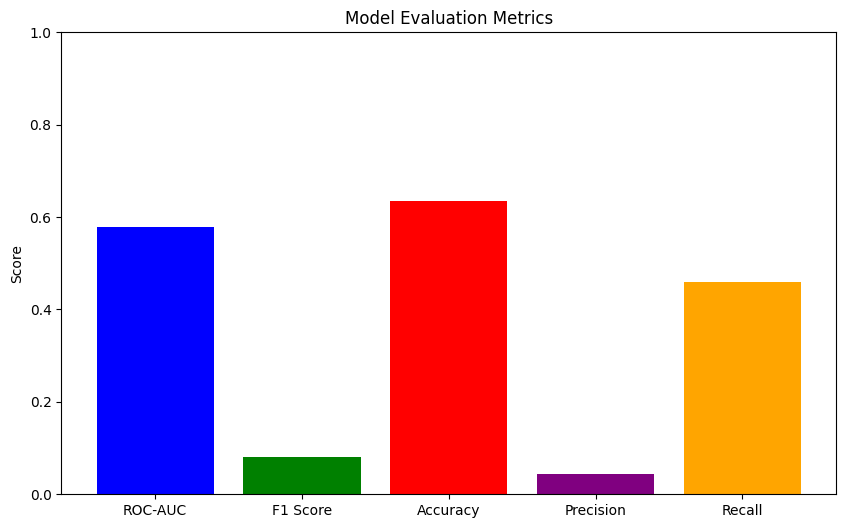

In [7]:
metrics = {
    'ROC-AUC': roc_auc,
    'F1 Score': f1,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall
}

metric_names = list(metrics.keys())
metric_values = list(metrics.values())

plt.figure(figsize=(10, 6))
plt.bar(metric_names, metric_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)
plt.show()